In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt # matplotlib içerisindeki pyplot modülünü plt olarak import ettik
import matplotlib as mpl # sadece matplotlibi import etmek etmek için kullanırız

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Geyser DataSet
***İçerik:*** Gayzerin patlama süreleri ve iki patlama arasındaki bekleme süreleri.

***Boyut:*** 272 gözlem satırı, 2 değişken.

***Değişkenler:***

***duration:*** Gayzerin patlama süresi (dakika cinsinden).

***waiting:*** Bir sonraki patlamaya kadar geçen süre (dakika cinsinden).

***📊 Kullanım Alanları***

***Regresyon*** (örneğin: bekleme süresine göre patlama süresi tahmini).

***Clustering / Kümeleme*** (kısa patlamalar & uzun patlamalar şeklinde iki grup çıkar).

***Dağılım grafikleri*** (scatter plot ile bekleme süresi ve patlama süresi ilişkisi).

***Zaman serisi analizleri*** (patlamaların sırası ile trend incelenmesi).

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
geyser = sns.load_dataset('geyser')
geyser

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long
...,...,...,...
267,4.117,81,long
268,2.150,46,short
269,4.417,90,long
270,1.817,46,short


In [5]:
geyser.head()

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long


In [6]:
geyser.tail()

,duration,waiting,kind
267,4.117,81,long
268,2.150,46,short
269,4.417,90,long
270,1.817,46,short
271,4.467,74,long


In [7]:
geyser.sample(3)

,duration,waiting,kind
198,2.250,51,short
8,1.950,51,short
91,4.333,90,long


In [17]:
geyser.shape # satır sütun sayısını verdi

(272, 3)

In [18]:
geyser.ndim # boyut bilgisi verdi

2

In [19]:
geyser.size # value sayısını verdi

816

In [8]:
geyser.info() # data setinin genel değerlendirmesi var

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duration  272 non-null    float64
 1   waiting   272 non-null    int64  
 2   kind      272 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 6.5+ KB


In [34]:
geyser.describe() # çeşitli istatistiki bilgileri bize çıktı olarak verdi

,duration,waiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


# Korelasyon Katsayısı

Değer aralığı: -1 ile +1 arasındadır.

+1 → Tam pozitif ilişki (biri artarken diğeri de artar).

-1 → Tam negatif ilişki (biri artarken diğeri azalır).

0 → Hiçbir ilişki yok.

In [35]:
geyser.corr(numeric_only = True) # 2 değişken ararsı korelasyonu verdi

,duration,waiting
duration,1.000000,0.900811
waiting,0.900811,1.000000


In [11]:
geyser.dtypes # sütunların type bilgisi verdi

duration    float64
waiting       int64
kind         object
dtype: object

In [12]:
geyser.columns # sütun isimleri verdi

Index(['duration', 'waiting', 'kind'], dtype='object')

In [13]:
geyser.index # index bilgisi verdi

RangeIndex(start=0, stop=272, step=1)

In [14]:
geyser.mean(numeric_only = True) # numeric değerler içeren sütunların ortalama bilgisini verdi

duration     3.487783
waiting     70.897059
dtype: float64

In [16]:
geyser.std(numeric_only = True) # numeric değerler içeren sütunların standart sapmasını verdi

duration     1.141371
waiting     13.594974
dtype: float64

In [37]:
geyser.kind.unique() # kind sütunu içinde unique değerlere baktı

array(['long', 'short'], dtype=object)

In [25]:
geyser.kind.value_counts() # geyserin long ve short patlama sayıları 

kind
long     172
short    100
Name: count, dtype: int64

In [14]:
geyser[geyser.waiting > 50] # waiting 50 üzeri olan değerleri çağırdık 246 satır döndü

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long
...,...,...,...
265,2.250,60,short
266,4.750,75,long
267,4.117,81,long
269,4.417,90,long


In [16]:
(geyser["waiting"] > 70).sum() # witing süresi 70 üzerinde olan 170 değer var

np.int64(165)

In [13]:
geyser[geyser.waiting > 50]['kind'].value_counts() # waiting 50 ve üzeri olanları long ve short sayısına baktık

kind
long     172
short     74
Name: count, dtype: int64

In [9]:
geyser.duration.sort_values().head(10) # duration sütunu artan sıralamada ilk 10 değeri yazdı.

18     1.600
57     1.667
114    1.700
54     1.733
21     1.750
62     1.750
43     1.750
16     1.750
222    1.750
13     1.750
Name: duration, dtype: float64

In [38]:
geyser.sort_values(by = 'waiting', ascending = False) # waiting sütununa göre büyükten küçüğe sıraladı

,duration,waiting,kind
148,5.100,96,long
217,4.800,94,long
169,4.617,93,long
157,4.083,93,long
65,4.400,92,long
...,...,...,...
134,1.833,46,short
130,1.867,45,short
126,1.917,45,short
160,2.200,45,short


In [39]:
geyser.groupby('kind')['duration'].mean() # kind a göre duration'ların ortalamasını aldık

kind
long     4.29793
short    2.09433
Name: duration, dtype: float64

In [42]:
geyser.groupby('kind')['waiting'].mean() # waiting a göre duration'ların ortalamasını aldık

kind
long     80.284884
short    54.750000
Name: waiting, dtype: float64

In [40]:
geyser.agg({'duration': lambda x: x.max()-x.min()}) # duration için max değer ve min değer arasındaki farkı aldı

duration    3.5
dtype: float64

In [41]:
geyser.agg({'waiting': lambda x: x.max()-x.min()}) # waiting için max değer ve min değer arasındaki farkı aldı

waiting    53
dtype: int64

In [17]:
geyser.loc[geyser["duration"] > 3, "waiting"].mean() # durationu 3 üzeri olan değerlerin waiting ortalamasını buldu

np.float64(79.98857142857143)

In [47]:
geyser['duration'].mean()

np.float64(3.4877830882352936)

In [65]:
geyser.groupby('kind').filter(lambda x: x['duration'].mean() > geyser['duration'].mean())
# kind ile gruplama yaptık ve grupladığımız her elemanın ortalaması sütunun ortalamasındana büyük olanı getirdi

,duration,waiting,kind
0,3.600,79,long
2,3.333,74,long
4,4.533,85,long
6,4.700,88,long
7,3.600,85,long
...,...,...,...
263,4.250,83,long
266,4.750,75,long
267,4.117,81,long
269,4.417,90,long


In [20]:
geyser['denger'] = np.where(( geyser['duration'] > 2.0 ) & ( geyser['kind'] == 'long' ) & (geyser['waiting'] > 50 ) , 'hight risk' , 'low risk' )
geyser
# risk içeren bir denger sütunu oluşturduk
# duration 2.0 dan büyük, kind = long ve waiting 50 ve üzeri olanlara hight risk yazdı, bunlardan birini sağlamıyorsa low risk yazdı

,duration,waiting,kind,denger
0,3.600,79,long,hight risk
1,1.800,54,short,low risk
2,3.333,74,long,hight risk
3,2.283,62,short,low risk
4,4.533,85,long,hight risk
...,...,...,...,...
267,4.117,81,long,hight risk
268,2.150,46,short,low risk
269,4.417,90,long,hight risk
270,1.817,46,short,low risk


In [69]:
geyser.denger.value_counts() # denger value saydı

denger
hight risk    172
low risk      100
Name: count, dtype: int64

In [71]:
geyser.head()

,duration,waiting,kind,denger
0,3.600,79,long,hight risk
1,1.800,54,short,low risk
2,3.333,74,long,hight risk
3,2.283,62,short,low risk
4,4.533,85,long,hight risk


In [77]:
geyser.isna() # satır sütun bazında boş değer varmı baktı. Boş olmayan değerlere False boş olana True yazdı.

,duration,waiting,kind,denger
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
267,False,False,False,False
268,False,False,False,False
269,False,False,False,False
270,False,False,False,False


In [72]:
geyser.isnull().sum() # sütunlarda nan değer varmı baktı

duration    0
waiting     0
kind        0
denger      0
dtype: int64

In [78]:
geyser.notnull() # satır sütun bazında boş olmayan değerlere baktı. Boş olmayanlara True boş olana False yazdı

,duration,waiting,kind,denger
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True
...,...,...,...,...
267,True,True,True,True
268,True,True,True,True
269,True,True,True,True
270,True,True,True,True


In [75]:
geyser.notna().sum() # dolu olan değer sayısına sütun bazında baktı

duration    272
waiting     272
kind        272
denger      272
dtype: int64

In [79]:
geyser.kind.mode() # kind en çok tekrar eden değeri getirdi.

0    long
Name: kind, dtype: object

In [81]:
geyser.denger.mode() # denger en çok tekrar eden değeri getirdi.

0    hight risk
Name: denger, dtype: object

# Matplotlib Grafikler

In [82]:
geyser.sample()

,duration,waiting,kind,denger
161,4.15,86,long,hight risk


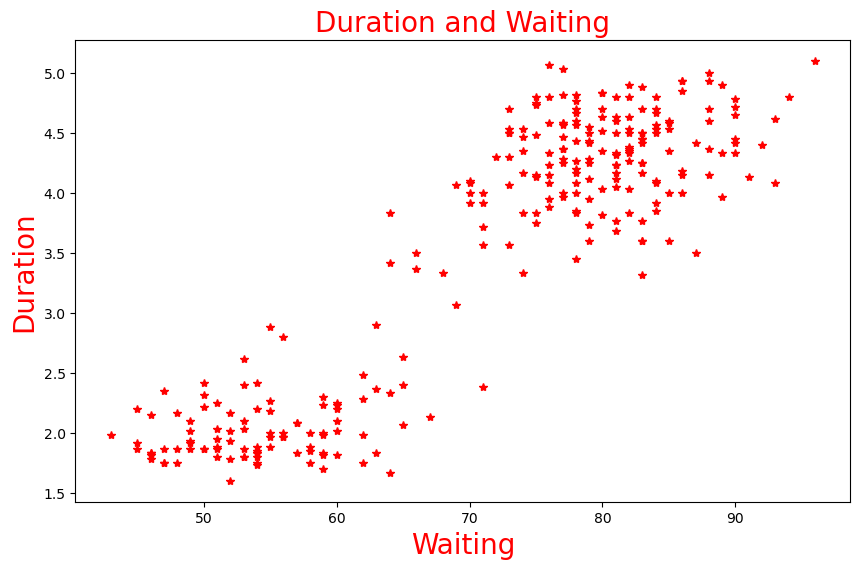

In [7]:
plt.figure(figsize = (10,6)) # line grafik

plt.plot(geyser['waiting'],geyser['duration'], 'r*')
plt.xlabel('Waiting', c = 'r', size = 20)
plt.ylabel('Duration', c = 'r', size = 20)
plt.title('Duration and Waiting', c = 'r', size = 20)
plt.show()

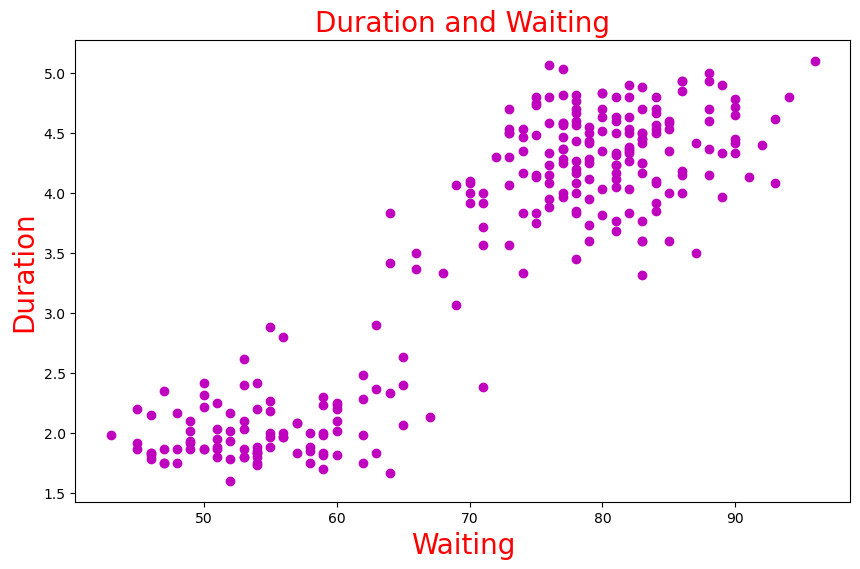

In [102]:
plt.figure(figsize = (10,6)) # scatter grafik

plt.scatter(geyser['waiting'],geyser['duration'], color = 'm')
plt.xlabel('Waiting', c = 'r', size = 20)
plt.ylabel('Duration', c = 'r', size = 20)
plt.title('Duration and Waiting', c = 'r', size = 20)
plt.show()

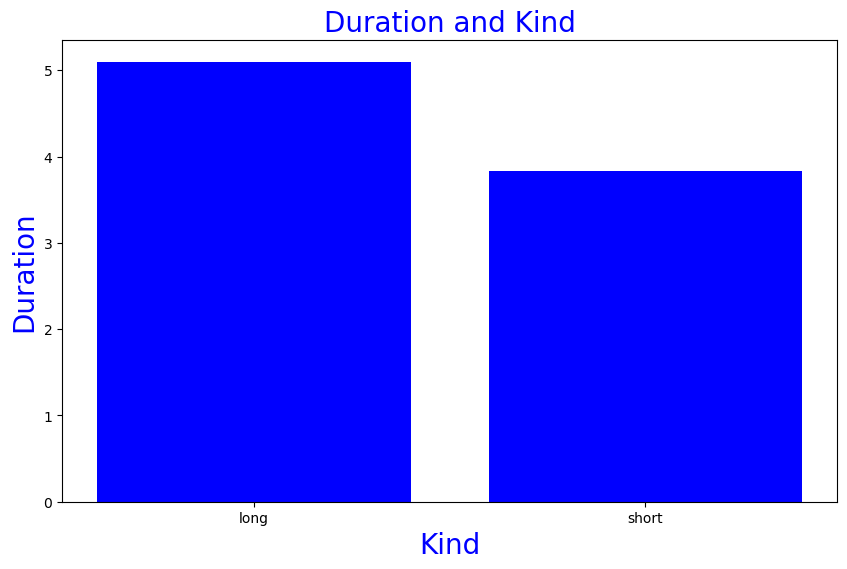

In [112]:
plt.figure(figsize = (10,6)) # bar grafik

plt.bar(geyser['kind'],geyser['duration'], color = 'b')
plt.xlabel('Kind', c = 'b', size = 20)
plt.ylabel('Duration', c = 'b', size = 20)
plt.title('Duration and Kind', c = 'b', size = 20)

plt.show()

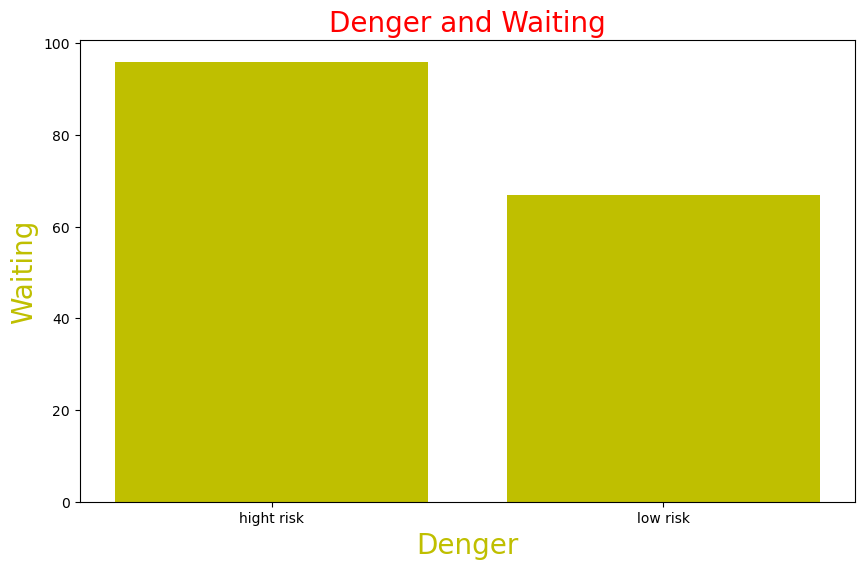

In [105]:
plt.figure(figsize = (10,6)) # bar grafik

plt.bar(geyser['denger'],geyser['waiting'], color = 'y')
plt.xlabel('Denger', c = 'y', size = 20)
plt.ylabel('Waiting', c = 'y', size = 20)
plt.title('Denger and Waiting', c = 'r', size = 20)
plt.show()

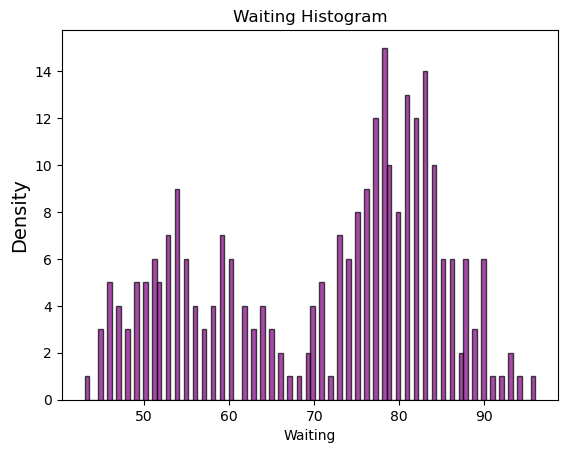

In [120]:
plt.hist(geyser['waiting'], bins = 100, alpha = 0.7, color = 'purple',edgecolor = 'black') # hist grafik
plt.title('Waiting Histogram')
plt.xlabel('Waiting')
plt.ylabel('Density', fontsize= 14)
plt.show()

In [122]:
geyser.sample()

,duration,waiting,kind,denger
132,2.8,56,short,low risk


In [129]:
geyser.denger.value_counts()

denger
hight risk    172
low risk      100
Name: count, dtype: int64

In [124]:
geyser.denger.value_counts().index

Index(['hight risk', 'low risk'], dtype='object', name='denger')

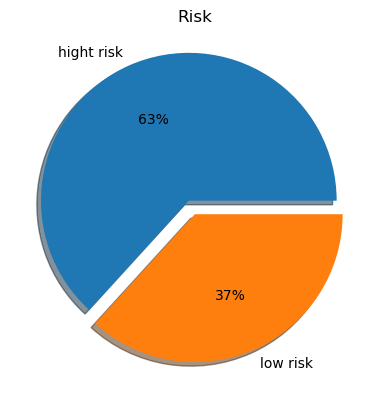

In [25]:
explode = [0.1, 0] # pie grafik
plt.pie(geyser.denger.value_counts(), labels = geyser.denger.value_counts().index , startangle = 0 , explode = explode , autopct = "%1.0f%%", shadow = True)
plt.title("Risk")
plt.show()

# Seaborn Grafik

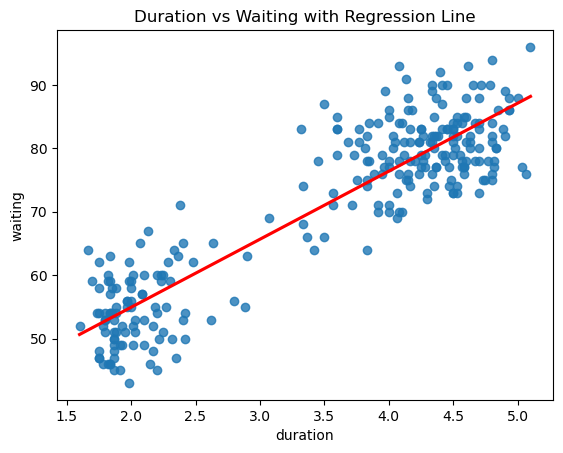

In [26]:
sns.regplot(x="duration", y="waiting", data=geyser, ci=None, line_kws={"color": "red"})
plt.title("Duration vs Waiting with Regression Line")
plt.show()